
# **Cilj projekta**

Kao set ulaznih podataka biće predstavljene informacije o NBA igračima koje su nam na raspolaganju. Na osnovu statistike igrača u njihovoj prvoj sezoni potrebno je izvršiti analizu podataka i generisati i uporediti dva različita modela, model logističke regresije i model stabla odlučivanja kojima treba predvideti da li će karijera igrača trajati barem 5 godina.

Nakon generisanja oba modela, potrebno je izabrati model koji daje bolje performanse i za tako izabrani model odrediti koja varijabla ima najveći uticaj na performanse izabranog modela,  odrediti konfuzionu matricu target i predict varijable (True Positive, True Negative,
False Positive, False Negative Rate) i obrazložiti dobijene vrednosti.

# Učitavanje, analiza i pretprocesiranje podataka

Učitavanje potrebnih biblioteka za rad

In [ ]:
#Učitavanje potrebnih biblioteka za rad
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math

Učitavanje i prikaz podataka

In [ ]:
#Učitavanje podataka i prikaz prvih 5 vrsta radi vizuelizacije problema
podaci=pd.read_csv('Junior ML test_data_NBA.csv')
podaci.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


**Prikaz strukture obeležja**

U nastavku možemo videti dimenzije podataka, kao i osnovne informacije o samoj strukturi i tipu podataka kada su u pitanju obeležja. Imamo obeležja tipa object, int64 i float 64.

In [ ]:
#Prikativanje dimenzija podataka kao i opisa obeležja sa tipovima podataka koje predstavljaju
print('Dimenzije podataka su: '+ str(np.shape(podaci)))
print('Struktura i tipovi podataka obeležja:')
podaci.info()


Dimenzije podataka su: (1340, 21)
Struktura i tipovi podataka obeležja:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 

Čišćenje podataka

In [ ]:
#Pronalaženje null vrednosti u setu podataka, njihovog procenta i prikaz strukture podataka
missing_values=podaci.isnull().sum()
procenat=podaci.isnull().sum()/len(podaci)*100
brprimera=len(podaci)
tip=podaci.dtypes
pd.DataFrame({'Ukupan broj primera': brprimera, 'Ukupan broj nedostajućih vrednosti': missing_values, 'Procenat nedostatka': procenat,'Tip promenljive': tip})

,Ukupan broj primera,Ukupan broj nedostajućih vrednosti,Procenat nedostatka,Tip promenljive
Name,1340,0,0.000000,object
GP,1340,0,0.000000,int64
MIN,1340,0,0.000000,float64
PTS,1340,0,0.000000,float64
FGM,1340,0,0.000000,float64
FGA,1340,0,0.000000,float64
FG%,1340,0,0.000000,float64
3P Made,1340,0,0.000000,float64
3PA,1340,0,0.000000,float64
3P%,1340,11,0.820896,float64


Kada se u našem setu pojavi slučaj nedostajućih ili nedefinisanih vrednosti, moramo pristupiti njihovom otklanjanju kako ne bi kvarili performanse našeg algoritma. Postoje različite metode otklanjanja ovih vrednosti, ako imamo jako veliki procenat nedostajućih vrednosti, možemo prosto takva obeležja potpuno ukloniti iz daljeg posmatranja. Kako je u ovom slučaju procenat nedostajućih vrednosti manji od 1%, to se neće raditi. Ako imamo manji broj nedostajućih vrednosti, možemo izbaciti primere u kojima nedostaju traženi podaci uz pomoć funkcije dropna() ili nedostajuća mesta zameniti nekim drugim vrednostima: nulama, srednjom vrednošću ili određenom rečju(promenljivom) ako su u pitanju object obeležja. Takođe, u slučajevima object obeležja uz pomoć funkcije get_dummies() možemo sintetisati nova obeležja i tako od jednog object obeležja napraviti više float64 ili int64 obeležja koji su pogodniji za obradu. Kako u našem slučaju postoji samo jedno object obeležje i to ono koje govori o samom imenu igrača, koje nije bitno u samom treniranju modela, nema potrebe za ovakvom obradom. U ovom slučaju nedostajuće vrednosti obeležja 3P% biće zamenjene srednjom vrednošću.

In [ ]:
#Prikaz osnovnih informacija i statističkih parametara promenljive sa null vrednostima
print('Prikaz osnovnih informacija i statističkih parametara obeležja:')
print(podaci['3P%'].describe())

#Popunjavanje null vrednosti srednjom vrednošću
podaci=podaci.fillna(podaci['3P%'].mean())

#Ponovni prikaz strukture podataka gde sada nema null vrednosti
missing_values=podaci.isnull().sum()
procenat=podaci.isnull().sum()/len(podaci)*100
brprimera=len(podaci)
tip=podaci.dtypes
pd.DataFrame({'Ukupan broj primera': brprimera, 'Ukupan broj nedostajućih vrednosti': missing_values, 'Procenat nedostatka': procenat,'Tip promenljive': tip})

Prikaz osnovnih informacija i statističkih parametara obeležja:
count    1329.000000
mean       19.308126
std        16.022916
min         0.000000
25%         0.000000
50%        22.400000
75%        32.500000
max       100.000000
Name: 3P%, dtype: float64


,Ukupan broj primera,Ukupan broj nedostajućih vrednosti,Procenat nedostatka,Tip promenljive
Name,1340,0,0.0,object
GP,1340,0,0.0,int64
MIN,1340,0,0.0,float64
PTS,1340,0,0.0,float64
FGM,1340,0,0.0,float64
FGA,1340,0,0.0,float64
FG%,1340,0,0.0,float64
3P Made,1340,0,0.0,float64
3PA,1340,0,0.0,float64
3P%,1340,0,0.0,float64


Sada kada sve promenljive imaju svoje vrednosti, možemo pristupiti posmatranju povezanosti između obeležja. Ideja je vizuelizovati obeležja kako bismo iz njih mogli da izvučemo neke zaključke. Takođe, kao još jedan vid informisanja, napravićemo korelacionu matricu obeležja u kojoj možemo uočiti stepen zavisnosti između svakog obeležja. Ako su obeležja nezavisna, koeficijent korelacije između njih jednak je nuli, a ako su zavisna, mogu biti pozitivno i negativno korelisana. Ako je apsolutna vrednost koeficijenta korelacije jako bliska jedinici, to znači da su data obeležja jako slična i da nose sličnu količinu informacija, stoga je jedno od ta dva obeležja višak i može se izbaciti.

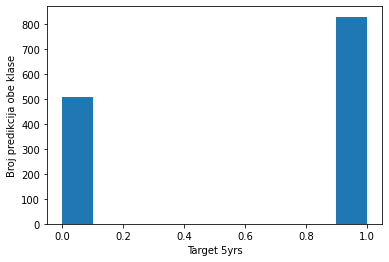

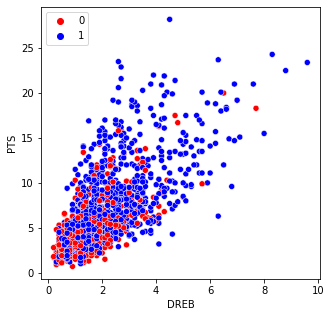

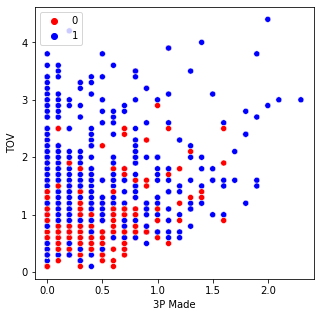

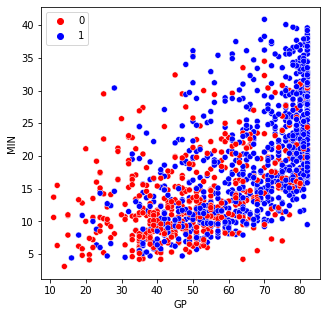

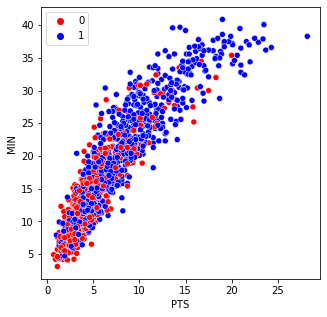

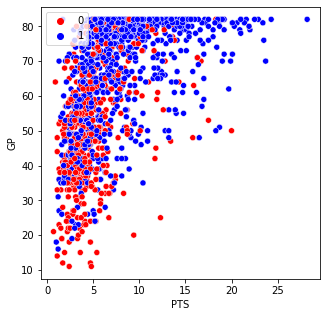

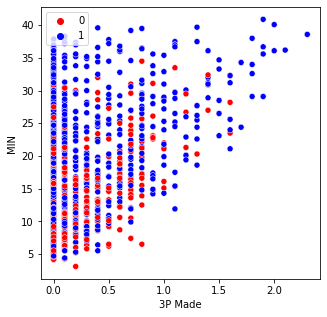

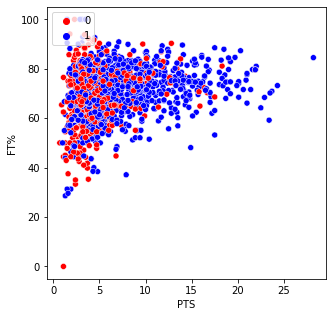

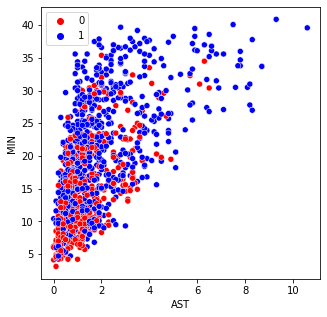

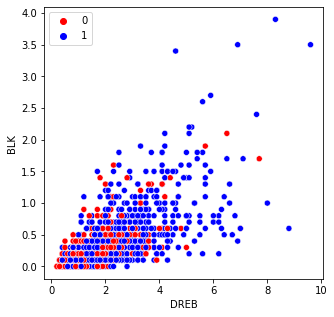

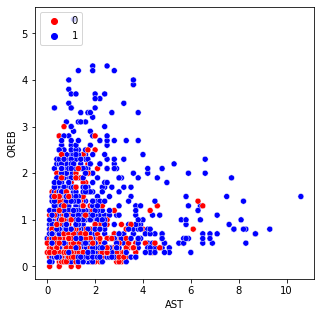

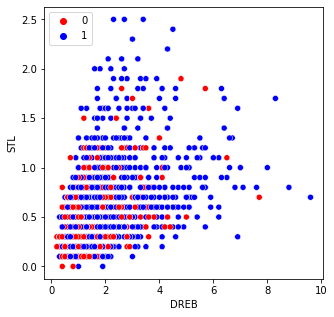

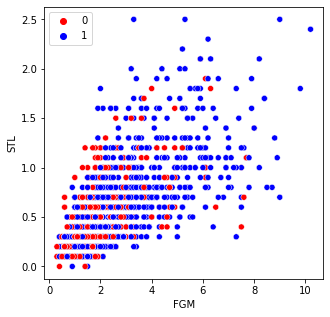

In [ ]:
#Prikaz raspodele izlazne promenljive radi uvida u balansiranost klasa
podaci.TARGET_5Yrs.plot(kind='hist')
plt.xlabel('Target 5yrs')
plt.ylabel('Broj predikcija obe klase')
plt.show()

#2D prikaz parova obeležja radi uvida u kompleksnost problema

#DREB i PTS
podaciplot=pd.DataFrame({'DREB':podaci['DREB'], 'PTS':podaci['PTS'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='DREB',y='PTS',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#3P Made i TOV
podaciplot=pd.DataFrame({'3P Made':podaci['3P Made'], 'TOV':podaci['TOV'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='3P Made',y='TOV',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#GP i MIN
podaciplot=pd.DataFrame({'GP':podaci['GP'], 'MIN':podaci['MIN'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='GP',y='MIN',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#PTS i MIN
podaciplot=pd.DataFrame({'PTS':podaci['PTS'], 'MIN':podaci['MIN'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='PTS',y='MIN',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#PTS i GP
podaciplot=pd.DataFrame({'PTS':podaci['PTS'], 'GP':podaci['GP'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='PTS',y='GP',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#3P Made i MIN
podaciplot=pd.DataFrame({'3P Made':podaci['3P Made'], 'MIN':podaci['MIN'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='3P Made',y='MIN',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#PTS i FT%
podaciplot=pd.DataFrame({'PTS':podaci['PTS'], 'FT%':podaci['FT%'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='PTS',y='FT%',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#AST i MIN
podaciplot=pd.DataFrame({'AST':podaci['AST'], 'MIN':podaci['MIN'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='AST',y='MIN',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#DREB i BLK
podaciplot=pd.DataFrame({'DREB':podaci['DREB'], 'BLK':podaci['BLK'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='DREB',y='BLK',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#AST i OREB
podaciplot=pd.DataFrame({'AST':podaci['AST'], 'OREB':podaci['OREB'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='AST',y='OREB',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#DREB i STL
podaciplot=pd.DataFrame({'DREB':podaci['DREB'], 'STL':podaci['STL'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='DREB',y='STL',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

#FGM i STL
podaciplot=pd.DataFrame({'FGM':podaci['FGM'], 'STL':podaci['STL'],'label': podaci['TARGET_5Yrs']})

fig,ax=plt.subplots(figsize=(5,5))
ax=sns.scatterplot(x='FGM',y='STL',hue = 'label',data=podaciplot,legend='full',
                     palette = {0:'red',1:'blue'})
ax.legend(loc='upper left')

Iz prethodne analize možemo zaključiti da klase nisu linearno separabilne i da postoji dosta odbiraka obe klase koji su blizu jedni drugima, stoga vizuelizacijom u 2D ravni ne možemo izneti valjane zaključke o obeležjima. Što se tiče vektora labela, možemo videti da postoji veći broj labela 1, tačnije 800, dok je labela za klasu 0 500, ali ima sasvim dovoljno primera i jedne i druge klase, tako da to neće biti problem.

Korelaciona matrica obeležja

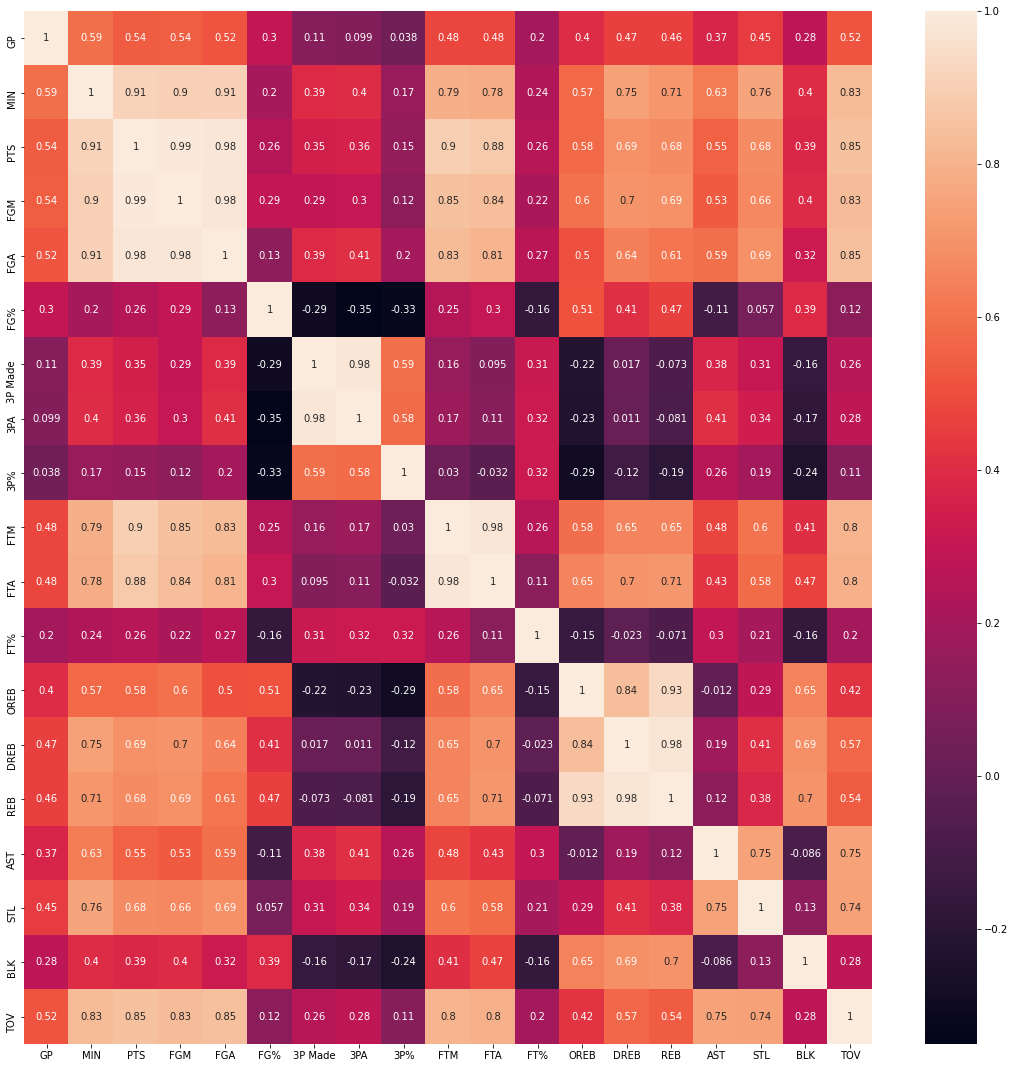

In [ ]:
#Prikaz korelacione matrice obeležja
plt.figure(figsize = (19,19))
sns.heatmap(podaci[['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV']].corr(), annot = True)
plt.show()

Iz date matrice vidimo da postoji dosta obeležja čija apsolutna vrednost koeficijenta korelacije iznosi preko 0.8. Potrebno je izbaciti odgovarajuća obeležja. Najpre ćemo imati uvid u vrednosti međusobne informacije između svakog obeležja i izlazne promenljive. Uzima se međusobna informacija pre nego korelacija između obeležja i izlaza jer gleda sve zavisnosti, a ne samo linearnu. Obeležje para sa velikom korelacijom koje će biti izbačeno je ono koje ima manju međusobnu informaciju sa izlaznom promenljivom.

In [ ]:
#Biblioteka za računanje međusobne informacije
from sklearn.feature_selection import mutual_info_classif

#Prikaz izračunate međusobne informacije
print('Međusobna informacija obeležja i izlaza:')
MI=mutual_info_classif(podaci[['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV']],podaci['TARGET_5Yrs'],discrete_features = True)
print('GP: '+str(MI[0]))
print('MIN: '+str(MI[1]))
print('PTS: '+str(MI[2]))
print('FGM: '+str(MI[3]))
print('FGA: '+str(MI[4]))
print('FG%: '+str(MI[5]))
print('3P Made: '+str(MI[6]))
print('3PA: '+str(MI[7]))
print('3P%: '+str(MI[8]))
print('FTM: '+str(MI[9]))
print('FTA: '+str(MI[10]))
print('FT%: '+str(MI[11]))
print('OREB: '+str(MI[12]))
print('DREB: '+str(MI[13]))
print('REB: '+str(MI[14]))
print('AST: '+str(MI[15]))
print('STL: '+str(MI[16]))
print('BLK: '+str(MI[17]))
print('TOV: '+str(MI[18]))

Međusobna informacija obeležja i izlaza:
GP: 0.10534355324943889
MIN: 0.18337945362495806
PTS: 0.13291883984685818
FGM: 0.10690147963987773
FGA: 0.10789028628818652
FG%: 0.1593184689575502
3P Made: 0.015032335903240112
3PA: 0.01997944110082707
3P%: 0.11634583411096441
FTM: 0.07578892256316212
FTA: 0.08171413438284926
FT%: 0.20813431327999213
OREB: 0.06304660072991582
DREB: 0.0735344383553762
REB: 0.09090476276474574
AST: 0.04115207889925965
STL: 0.0385735280300431
BLK: 0.040533040817796025
TOV: 0.0592640861910966


Uvidom u međusobnu informaciju i matricu korelacije izbacuju se obeležja sa velikim koeficijentom korelacije i malom međusobnom informacijom. Između dva obeležja visoke korelacije biramo ono obeležje koje ima manju međusobnu informaciju, stoga izbacujemo obeležja 'PTS', 'FGM', 'FGA', 'DREB', 'OREB', 'TOV', '3P Made', 'FTM' i 'FTA' čime smo problem smanjili na desetodimenzionalni problem.

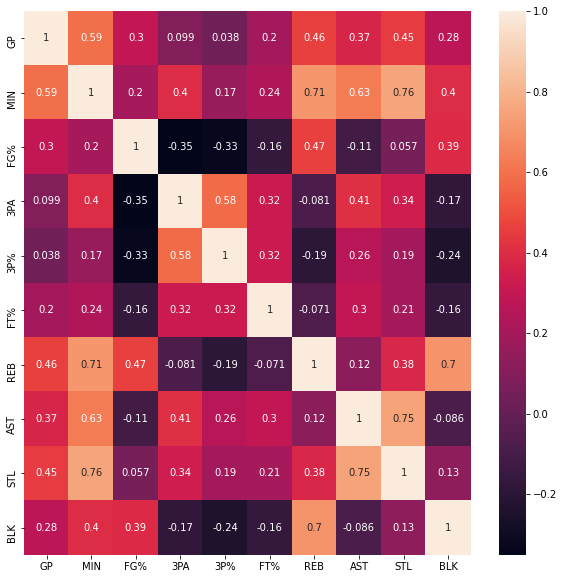

In [ ]:
#Izbacivanje obeležja sa visokom korelacijom i malom međusobnom informacijom
podaci.drop(['PTS','FGM','FGA','DREB','OREB','TOV','3P Made','FTM','FTA'],axis=1,inplace=True)

#Prikaz nove korelacione matrice preostalih obeležja
plt.figure(figsize = (10,10))
sns.heatmap(podaci[['GP','MIN','FG%','3PA','3P%','FT%','REB','AST','STL','BLK']].corr(), annot = True)
plt.show()

Sada imamo samo obeležja sa prihvatljivim koeficijentom korelacije. U nastavku posmatramo boxplot obeležja gde možemo videti oko kojih vrednosti se nalazi najveći broj obeležja, kao i koje su njihove maksimalne i minimalne vrednosti.

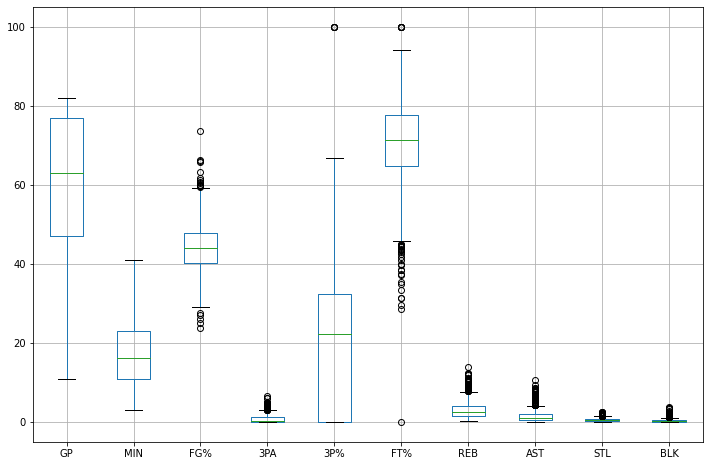

In [ ]:
#Prikaz box plot-a obeležja
plt.figure(figsize = (12,8))
pd.DataFrame.boxplot(podaci[['GP','MIN','FG%','3PA','3P%','FT%','REB','AST','STL','BLK']])
plt.show()

Sada kada smo izvršili analizu podataka i ostavili one najbolje, možemo pristupiti daljem radu. Pre nego što stupimo u proces pravljenja modela, potrebno je izvršiti standardizaciju obeležja. To je postupak u kome svakom obeležju oduzimamo srednju vrednost i delimo ga sa standardnom devijacijom. Poenta ovoga je ta što su različita obeležja u različitom domenu, neka obeležja predstavljaju velike vrednosti, a neka jako male, ne želimo da ijedno obeležje ima veći uticaj u odnosu na ono drugo, pa zato radimo standardizaciju obeležja kako bismo obezbedili podjednaku bitnost, a i sam proces standardizacije pomaže u vremenskoj kompleksnosti jer je samim tim brže izračunavanje potrebnih gradijenata i formula. Pritom ćemo podatke podeliti na obeležja X i izlaznu promenljivu Y. U vektor X ne stavljamo obeležje 'Name' zato što je nebitno za sam model. Podatke delimo na trening i test skup, nakon čega radimo standardizaciju tako što i trening i test skup standardizujemo srednjom vrednošću i standardnom devijacijom dobijenih iz trening skupa.

Standardizaciju vršimo po sledećoj formuli:

$$x_{stand}=\frac{x^i-srvr(x^i)}{std(x^i)}$$


In [ ]:
#Biblioteke za podelu podataka i standardizaciju
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Podela na obeležja i labele
X=np.array(podaci[['GP','MIN','FG%','3PA','3P%','FT%','REB','AST','STL','BLK']])
Y=np.array(podaci['TARGET_5Yrs'])

#Podela na trening i test skup podataka
Xtrain,Xtest,Ytrain,Ytest=train_test_split( X, Y, test_size=0.2, random_state=4)

#Standardizacija podataka statističkim parametrima trening skupa
scaler = StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

Dimenzije trening i test skupa

In [ ]:
#Dimenzije trening i test skupa
print('Dimenzije trening skupa: '+str(Xtrain.shape))
print('Dimenzije test skupa: '+str(Xtest.shape))

Dimenzije trening skupa: (1072, 10)
Dimenzije test skupa: (268, 10)


# Model Logističke regresije

**Sigmoid funkcija za logisticku regresiju**

Ovo je funkcija kojoj se prosledjuju zeljeni parametri kako bi se dobili podaci koji su relevantni za obradu podataka u logistickoj regresiji koji su ograniceni svojom vrednoscu od 0 do 1.

Oblik logisticke funkcije je:

$ h_{\theta}(x)=\frac{1}{1+\exp^{-\theta^{T}X}} $


**Logisticka regresija**

U logistickoj regresiji defnisemo zeljenu hipotezu koja je u granici od 0 do 1. Logisticka regresija je dobra za resavanje problema klasifikacije kada je u pitanju masinsko ucenje.

 Kao zeljeni kriterijum definisemo log verodostojnost:


 $l(\theta)=\sum\limits\ _{i=1} ^{m} (y^{(i)}ln(h_{\theta}(x^{(i)}))+(1-y^{(i)})ln(1-h_{\theta}(x^{(i)})))$

U nastavku ćemo koristiti ugrađene funkcije za pravljenje modela logističke regresije.

Prvo isprobavamo obicni model prvog stepena bez regularizacije. Pošto imamo znatno više parametara klase 1, iskoristićemo balansiranje klasa koje veće težine dodeljuje primerima koji su iz klase 0 kako bi procena bila što tačnija.

In [ ]:
#Učitavanje potrebnih biblioteka za model i računanje metrika
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Definisanje modela i obučavanje na trening podacima modela prvog reda bez regularizacije
lr=LogisticRegression(C=1e5,class_weight='balanced')
lr.fit(Xtrain,Ytrain)

#Predikcija na trening i test skupu i prikaz performansi modela
Ytrainpred=lr.predict(Xtrain)
Ytestpred=lr.predict(Xtest)
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Ytrainpred,Ytrain)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Ytestpred,Ytest)*100,'%')
print('F1 Score na obučavajućem skupu je: ',f1_score(Ytrainpred,Ytrain,average='weighted')*100,'%')
print('F1 Score na test skupu je: ',f1_score(Ytestpred,Ytest,average='weighted')*100,'%')

Tačnost na obučavajućem skupu je:  69.86940298507463 %
Tačnost na test skupu je:  69.02985074626866 %
F1 Score na obučavajućem skupu je:  69.55809748043173 %
F1 Score na test skupu je:  68.4870095232918 %


Kao što se može primetiti, perfomanse algoritma nisu baš sjajne, ali jasno je da su metrike i na trening i na test skupu približne, što znači da nije došlo do preobučavanja.

U nastavku ćemo pokušati sa polinomijalnom regresijom, odnosno uvođenjem novih polinomijalnih obeležja većeg stepena. Kao najbolji stepen izabraće se onaj stepen u kome je vrednost greške na validacionom skupu najmanja.

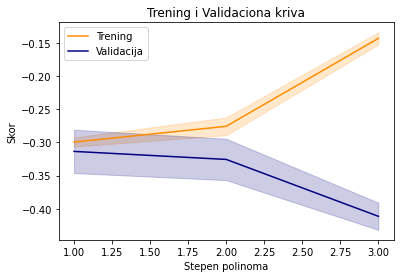

In [ ]:
#Učitavanje potrebnih biblioteka za krosvalidaciju modela
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve

#Definisanje modela polinomijalnih obeležja
model=make_pipeline(PolynomialFeatures(degree=5, include_bias=False), LogisticRegression(C=1e5,max_iter=10000,class_weight='balanced'))

#Definisanje opsega stepena polinoma i krosvalidacija nad tim stepenima
degree=np.arange(1,4)
train_scores,test_scores=validation_curve(model,Xtrain,Ytrain,param_name='polynomialfeatures__degree',param_range=degree,cv=5,scoring='neg_mean_squared_error')

#Računanje srednjih vrednosti trening i validacione krive za svaki stepen
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Prikaz trening i validacione krive
plt.title("Trening i Validaciona kriva")
plt.xlabel("Stepen polinoma")
plt.ylabel("Skor")
lw=2
plt.plot(degree, train_scores_mean, label="Trening",color="darkorange")
plt.fill_between(degree, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,color="darkorange")
plt.plot(degree, test_scores_mean, label="Validacija",color="navy")
plt.fill_between(degree, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2,color="navy")
plt.legend(loc="best")
plt.show()

Iz gore priloženog da se zaključiti da je validaciona greška najmanja za prvi stepen polinoma, što znači da sa povećanjem reda polinoma dolazi do preobučavanja modela. Preobučavanje se može sprečiti uvođenjem regularizacije, stoga će u sledećem odeljku biti prikazan polinom stepena 2 sa uvedenom regularizacijom, kako bismo uvideli da li će imati bolje performanse od modela prvog stepena. Po prirodi problema, uvođenjem novih obeležja koja predstavljaju neku zavisnost sa već postojećim obeležjima između kojih postoji veliki procenat korelisanosti se ne očekuje preterano poboljšanje performansi, u nekim slučajevima čak i nikakvo, uvođenjem novih obeležja možemo samo dodatno podstaći model da se preobuči, ali radi analize svih mogućnosti ovaj postupak je ipak proveren.

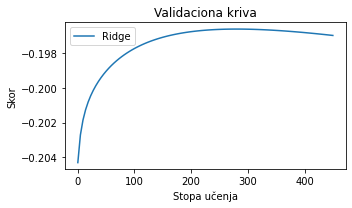

In [ ]:
#Učitavanje potrebnih biblioteka za krosvalidaciju stopom učenja i odgovarajućeg modela regularizacije
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

#Pravljenje polinomijalnih obeležja
Xtrainpoly=PolynomialFeatures(degree=2,include_bias=False).fit_transform(Xtrain)

#Krosvalidacija i prikaz dobijene validacione krive
plt.figure(figsize=(5,3))
alphas=np.linspace(1e-3, 450, 100)
scores=[cross_val_score(Ridge(alpha),Xtrainpoly,Ytrain,cv=5,scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas,scores, label='Ridge')
plt.legend(loc='best')
plt.title('Validaciona kriva')
plt.xlabel('Stopa učenja')
plt.ylabel('Skor')
plt.tight_layout()
plt.show()

In [ ]:
#Definisanje modela drugog stepena sa regularizacijom optimalne stope učenja i obučavanje modela
model=make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LogisticRegression(C=0.004,max_iter=1000,class_weight='balanced'))
model.fit(Xtrain,Ytrain)

#Predikcija nad istreniranim modelom i prikaz performansi modela
Ytrainpred=model.predict(Xtrain)
Ytestpred=model.predict(Xtest)
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Ytrainpred,Ytrain)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Ytestpred,Ytest)*100,'%')
print('F1 Score na obučavajućem skupu je: ',f1_score(Ytrainpred,Ytrain,average='weighted')*100,'%')
print('F1 Score na test skupu je: ',f1_score(Ytestpred,Ytest,average='weighted')*100,'%')

Tačnost na obučavajućem skupu je:  70.05597014925374 %
Tačnost na test skupu je:  66.04477611940298 %
F1 Score na obučavajućem skupu je:  69.71291693996884 %
F1 Score na test skupu je:  65.44961285083801 %


Iz datog grafika i analize modela može se zaključiti da je skor validacione krive najbolji za veliku vrednost stope učenja, otprilike oko 250, a ako je stopa učenja jako velika, znači da je stepen regularizacije jako veliki, čime se zapravo ovaj model svodi na model prvog stepena. Odatle zaključujemo da je najbolje izabrati model prvog reda kako viši modeli nemaju znatno bolje performanse i prilikom upotrebe regularizacije,već ostaju preobučeni.

Konačni model logističke regresije - Model prvog reda bez regularizacije

Tačnost na obučavajućem skupu je:  69.86940298507463 %
Tačnost na test skupu je:  69.02985074626866 %
F1 Score na obučavajućem skupu je:  69.55809748043173 %
F1 Score na test skupu je:  68.4870095232918 %

Feature: 0, Score: 0.63996
Feature: 1, Score: -0.12750
Feature: 2, Score: 0.22924
Feature: 3, Score: 0.03138
Feature: 4, Score: 0.05330
Feature: 5, Score: 0.20233
Feature: 6, Score: 0.37273
Feature: 7, Score: 0.14930
Feature: 8, Score: 0.06144
Feature: 9, Score: 0.19330


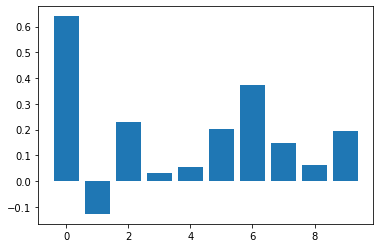

Obeležje koje najviše utiče na model je prvo obeležje, odnosno obeležje GAME PLAYED.



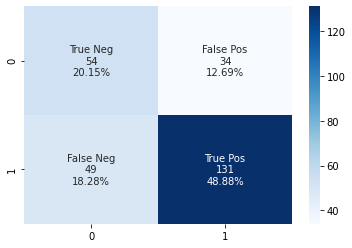

In [ ]:
#Definisanje najboljeg modela i obučavanje nad trening skupom
lr=LogisticRegression(C=1e5,class_weight='balanced')
lr.fit(Xtrain,Ytrain)

#Predikcija istreniranog modela i prikaz performansi
Ytrainpred=lr.predict(Xtrain)
Ytestpred=lr.predict(Xtest)
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Ytrainpred,Ytrain)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Ytestpred,Ytest)*100,'%')
print('F1 Score na obučavajućem skupu je: ',f1_score(Ytrainpred,Ytrain,average='weighted')*100,'%')
print('F1 Score na test skupu je: ',f1_score(Ytestpred,Ytest,average='weighted')*100,'%')
print()

#Računanje obeležja koje najviše utiče na performanse modela
importance =lr.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

#Prikaz dobijenog najbitnijeg obeležja
print('Obeležje koje najviše utiče na model je prvo obeležje, odnosno obeležje GAME PLAYED.')
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Ytest,Ytestpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Iz datih rezultata možemo zaključiti da je tačnost algoritma na test skupu oko 69%, dok je F1 skor oko 76%. Kada su u pitanju nebalansirane klase, bolje je posmatrati F1 skor jer on daje podjednaku važnost i Precision i Recall. Obeležje koje najviše utiče na izlaz je prvo obeležje Game Played, što je i očekivano jer dato obeležje ima najveću međusobnu informaciju sa izlazom, kao i najveći stepen korelacije sa izlazom, pa se i očekivalo da pojačanje uz dato obeležje bude najveće.

Matrica konfuzije predstavlja prikaz dobro i loše klasifikovanih primera. True Positive primeri su oni koji su stvarno jedinica i prepoznati su kao jedinica, True Negative su oni koji su stvarno nule i prepoznati su kao nule. False Positive su oni koji su prepoznati kao jedinice, a u stvari su nule i False Negative su oni koji su prepoznati kao nule, a u stvari su jedinice. Na osnovu konfuzione matrice računaju se metrike za odlikovanje performansi modela kao što su Accuracy, F1 Score, Precision, Recall i mnoge druge.


# Decision Tree model

Decision Tree model predstavlja model stabla odlučivanja. Stabla odlučivanja imaju prednost u odnosu na ostale algoritme zato što su interpretabilna, prosta, brza i interkativna, možemo lako objasniti nekome kako smo došli do rezultata na osnovu prikaza nekog od stabala. Loša stvar kod stabala odlučivanja je što su sklona preobučavanju, imaju veliku varijansu, ali za veliki broj problema daju dobre rezultate. U ovom slučaju koristiće se ugrađena funkcija **sklearn.tree.DecisionTreeClassifier()**. U svakom sloju bira se ona odluka čija je Džinijeva nečistoća najmanja ili ako gledamo entropiju, ona čija je entropija najmanja. Možemo ograničiti dubinu stabla i tako sprečiti preobučavanje, možemo prestati sa obučavanjem ako vidimo da se Džinijeva nečistoća ili entropija znatno ne smanjuje ili ako smo dostigli željeni broj listova u stablu i slično.

$$GI=1-\sum_{i=1}^{n}(p_{i})^2$$

$$Entropy=-\sum_{j}p_{j}log_{2}p_{j}$$

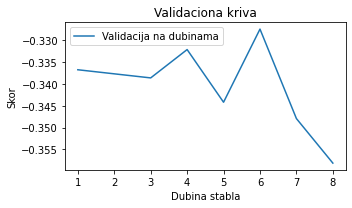

In [ ]:
#Učitavanje biblioteke za rad sa stablom učenja
from sklearn import tree

#Krosvalidacija različitim dubinama i prikaz validacione krive takvih modela
plt.figure(figsize=(5,3))
depths=np.linspace(1,8,8)
scores=[cross_val_score(tree.DecisionTreeClassifier(class_weight='balanced',max_depth=dubina,criterion='entropy'),Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean() for dubina in depths]
plt.plot(depths,scores, label='Validacija na dubinama')
plt.legend(loc='best')
plt.title('Validaciona kriva')
plt.xlabel('Dubina stabla')
plt.ylabel('Skor')
plt.tight_layout()
plt.show()

Uvidom u grafik krosvalidacije, nismo u mogućnosti da tačno odredimo koja dubina stabla je najbolja jer se validaciona kriva kreće manje-više slučajnim putem. Ono što je svakako situacija kada su u pitanju stabla odlučivanja je da su ona sklona preobučavanju, što je veći parametar dubine, verovatnoća za preobučavanje modela je veća, stoga velike dubine stabala nećemo razmatrati. Uvidom u pojedinačne modele datih dubina zaključeno je da su najbolje performanse modela na dubini 2 korišćenjem entropije kao kriterijuma. U nastavku će biti prikazani rezultati dobijeni korišćenjem modela sa dubinom 2.

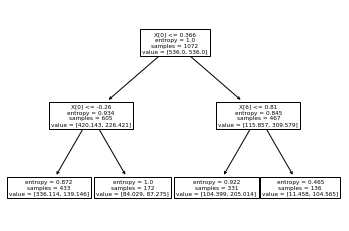

Tačnost na obučavajućem skupu je:  69.58955223880598 %
Tačnost na test skupu je:  66.4179104477612 %
F1 Score na obučavajućem skupu je:  69.51733964023356 %
F1 Score na test skupu je:  66.06947967671523 %

Feature: 0, Score: 0.86334
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.13666
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


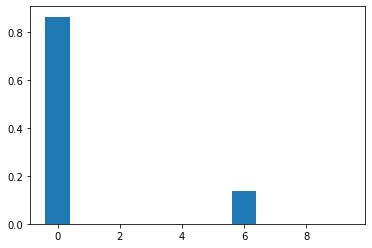

Najveći uticaj na stablo odlučivanja ima prvo obeležje 'Game Played'.



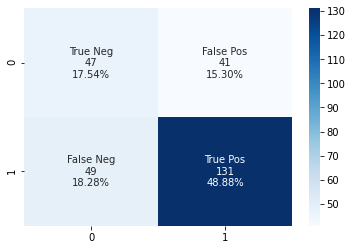

In [ ]:
#Definisanje najboljeg modela dubine 2 sa kriterijumom entropije i treniranje modela
clf=tree.DecisionTreeClassifier(class_weight='balanced',max_depth=2,criterion='entropy')
clf=clf.fit(Xtrain,Ytrain)

#Prikaz dobijenog stabla
plt.figure()
tree.plot_tree(clf)
Ytrainpred=clf.predict(Xtrain)
Ytestpred=clf.predict(Xtest)
plt.show()

#Prikaz performansi dobijenih predikcijom istreniranog modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Ytrainpred,Ytrain)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Ytestpred,Ytest)*100,'%')
print('F1 Score na obučavajućem skupu je: ',f1_score(Ytrainpred,Ytrain,average='weighted')*100,'%')
print('F1 Score na test skupu je: ',f1_score(Ytestpred,Ytest,average='weighted')*100,'%')
print()

#Računanje i prikaz obeležja koje najviše utiče na performanse modela
plt.figure()
importance=clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Najveći uticaj na stablo odlučivanja ima prvo obeležje 'Game Played'.")
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Ytest,Ytestpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Ovde možemo videti prikaz stabla dubine 2 koje je dobijeno. Za svaki sloj stabla moguće je videti vrednosti entropije, broja odbiraka u datoj grani i način klasifikovanja datih primera u tom sloju. Performanse algoritma su i za tačnost i za F1 skor približno iste, tačnost i F1 skor na trening skupu iznose oko 69%, dok tačnost i F1 skor na test skupu iznose oko 66%. Kao i kod logističke regresije, obeležje koje ima najveći uticaj na performanse je prvo obeležje Game Played, što je i logično nakon posmatranja međusobne informacije između obeležja i izlaza na samom početku.

Matrica konfuzije predstavlja prikaz dobro i loše klasifikovanih primera. True Positive primeri su oni koji su stvarno jedinica i prepoznati su kao jedinica, True Negative su oni koji su stvarno nule i prepoznati su kao nule. False Positive su oni koji su prepoznati kao jedinice, a u stvari su nule i False Negative su oni koji su prepoznati kao nule, a u stvari su jedinice. Na osnovu konfuzione matrice računaju se metrike za odlikovanje performansi modela kao što su Accuracy, F1 Score, Precision, Recall i mnoge druge.

# Zaključak o izboru modela

Prilikom izrade ovog zadatka, nakon analize i pretprocesiranja podataka korišćena su dva modela klasifikacije, logistička regresija i stablo odlučivanja. Kada je u pitanju model logističke regresije donesen je zaključak da je od svih mogućih modela najbolji model prvog stepena, kako modeli višeg reda nisu mogli da se izbore sa problemom preobučavanja. Ovim postupkom dobijene su performanse tačnosti i F1 skora za trening skup oko 70% i za test skup oko 69%. Ovakav rezultat nije baš zadovoljavajući, ali takvi su podaci u pitanju da bolja procena nije mogla da se napravi. Što se tiče stabla odlučivanja, stablo sa najboljom performansom je stablo dubine 2, čime smo dobili performanse modela tačnosti i F1 skora na trening skupo oko 69% i na test skupu oko 66%. Samim upoređivanjem ova dva modela dolazimo do zaključka da nešto bolje performanse ima model logističke regresije prvog reda. Greške na trening i test skupu kod ovog modela su gotovo identične, razlikuju se za oko 1% što je prihvatljivo, dok se kod stabla odlučivanja greške razlikuju za 3% i više, što je znak da je već došlo do toga da se stablo odlučivanja preobučava i to već na dubini 2. Iako su stabla odlučivanja iterpretabilna, prosta i brza, vizuelno dobra za klijenta, nekada ona stvarno nisu najbolje rešenje. Pokazuje se u praksi da kada su u pitanju numericki podaci, odnosno samo numerička obeležja, da bolje radi model logističke regresije, dok model stabla odlučivanja bolje radi za kategorička obleežja, a za njih je i interpretabilniji Kada imamo kategoričko obeležje, jasno možemo videti diskriminaciju između dve klase, dok kod numeričkog obeležja to predstavlja neki prag, odnosno realan broj, što i nije toliko prijemčivo klijentu, zato se iz ove analize izvodi zaključak da je model logističke regresije bolji izbor.

# Dodatna ispitivanja

# Gradient Boosting model

Tačnost na obučavajućem skupu je:  75.83955223880598 %
Tačnost na test skupu je:  71.26865671641791 %
F1 Score na obučavajućem skupu je:  76.2589663512201 %
F1 Score na test skupu je:  72.03244646333549 %

Feature: 0, Score: 0.53024
Feature: 1, Score: 0.09669
Feature: 2, Score: 0.14610
Feature: 3, Score: 0.00360
Feature: 4, Score: 0.02752
Feature: 5, Score: 0.07532
Feature: 6, Score: 0.08388
Feature: 7, Score: 0.00252
Feature: 8, Score: 0.00640
Feature: 9, Score: 0.02773


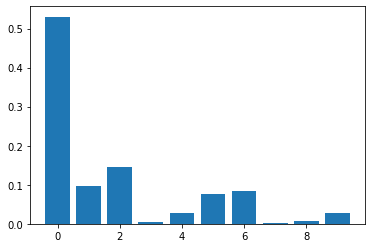

Najveći uticaj na stablo odlučivanja ima prvo obeležje 'Game Played'.



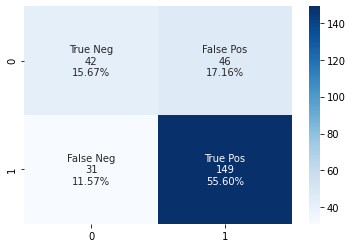

In [ ]:
#Učitavanje potrebne biblioteke za rad sa Gradient Boosting modelom
from sklearn.ensemble import GradientBoostingClassifier

#Definisanje modela dubine 2 sa 60 estimatora i njegovo obučavanje na trening skupu
clf=GradientBoostingClassifier(n_estimators=60,max_depth=2)
clf=clf.fit(Xtrain,Ytrain)

#Predikcija istreniranog modela na trening i test skupu i prikaz performansi
Ytrainpred=clf.predict(Xtrain)
Ytestpred=clf.predict(Xtest)

print('Tačnost na obučavajućem skupu je: ',accuracy_score(Ytrainpred,Ytrain)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Ytestpred,Ytest)*100,'%')
print('F1 Score na obučavajućem skupu je: ',f1_score(Ytrainpred,Ytrain,average='weighted')*100,'%')
print('F1 Score na test skupu je: ',f1_score(Ytestpred,Ytest,average='weighted')*100,'%')
print()

#Računanje obeležja koje najviše utiče na performanse modela
plt.figure()
importance=clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Najveći uticaj na stablo odlučivanja ima prvo obeležje 'Game Played'.")
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Ytest,Ytestpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Model Gradient Boosting razlikuje se od samog stabla odlučivanja i Random Forest algoritma jer radi sekvencijalno, učenik u nekom sloju zavisi od učenika u prethodnom sloju, odnosno teži da popravi njegove performanse, dok se kod Random Forest algoritma paralelno obučavaju stabla odlučivanja, pa se njihovim usrednjavanjem bira onaj najbolji. U ovom slučaju uzet je broj estimatora 60, odnosno broj stabala koja se koriste, dok je dubina stabla izabrana kao 2. Uvidom u performanse ovog algoritma vidimo da on ima nešto bolje performanse od oba gore posmatrana algoritma. Tačnost i F1 skor trening skupa su u opsegu 75-76% dok su tačnost i F1 skor test skupa u opsegu 71-72%. Greška na trening i test skupu se ne razlikuje mnogo, prihvatljiva je, nije došlo do velikog preobučavanja modela. Kada bi i ovaj model bio u mogućem izboru, onda bi sigurno on bio pobednik kada je u pitanju ovaj zadati problem.